# IMPORTATION DES DONNEES ET CHARGEMENT DE LA LIBRAIRIE

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
from ipywidgets import interact

# les méthodes de prétraitement

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler

# les modeles de machine learning pour la situation

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

from sklearn.svm import SVC

from sklearn.metrics import  classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('heart_disease.xlsx')

In [3]:
data = df.copy()

In [4]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [5]:
df.shape

(918, 12)

# PREPROCESSING 

Il n'y a pas de données manquantes dans ce jeu de données.
Nous allons donc nous intéresser à l'encodage des variables qualitatives, à la normalisation des variables quantitatives
et aux données abérrantes et cela par étapes avant d'aller à la modelisation pour chacun de ces cas jusqu'à trouver le bon modele 

- Encodage des variables qualitatives

In [6]:
def features_ordinal(dataframe,variable):
    '''Fonction permettant d'encoder les variables qualitatives ordinales
    :param dataframe:fournir le dataframe
    :param variable: fournir la liste de variable
    '''
    modalite={
        'femme':0,
        'homme':1,
        'AT':0,
        'AA':1,
        'DNA':2,
        'ASY':3,
        'Normal':0,
        'ST':1,
        'LVH':2,
        'Oui':1,
        'Non':0,
        'Ascendant':0,
        'Plat':1,
        'Descendant':2
        
    }
    for col in variable:
        if dataframe[col].dtype==object:
            dataframe.loc[:,col]=dataframe[col].map(modalite)

In [7]:
variable= df.select_dtypes(object).columns
features_ordinal(df,variable)
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


- Division du jeu de donnée en jeu d'apprentissage et de test

In [8]:
X=df.drop('CŒUR',axis=1)
y=df['CŒUR']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

On  a conservé les memes proportions pour la variable cible en test,entrainenment et validation

- Modelisation 1

In [13]:
# selection des variables 

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train,y_train)

accuracy_score(y_test,rf.predict(X_test))

0.907608695652174

In [14]:
print(rf.feature_importances_)

[0.07449733 0.02857452 0.12995175 0.06599451 0.10201219 0.02441361
 0.02408754 0.11410641 0.07415575 0.10282105 0.25938533]


In [15]:
vars_imp=pd.Series(rf.feature_importances_ , index=X_train.columns).sort_values(ascending=False)
vars_imp

PENTE          0.259385
TDT            0.129952
FCMAX          0.114106
DEPRESSION     0.102821
CHOLESTEROL    0.102012
AGE            0.074497
ANGINE         0.074156
PAR            0.065995
SEXE           0.028575
GAJ            0.024414
ECG            0.024088
dtype: float64

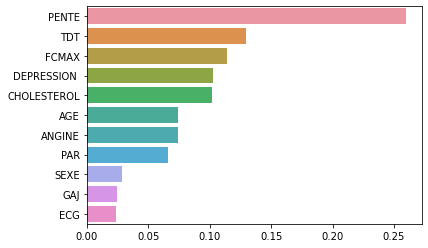

In [16]:
sb.barplot(x=vars_imp,y=vars_imp.index)
plt.show()

In [17]:
vars_non_imp=['GAJ','SEXE','ECG']

X_train = X_train.drop(vars_non_imp, axis=1)

X_test=X_test.drop(vars_non_imp, axis=1)

In [19]:
# #Regression logistique

# lr= LogisticRegression(random_state=0)

# lr_hyp_param={'C': [0.001,0.01,0.1, 1.0, 10, 100] }

# lr_cv=GridSearchCV(lr, lr_hyp_param, cv = 5)

# lr_cv.fit(X_train,y_train)

# print(lr_cv.best_score_)
# print(lr_cv.best_estimator_)

In [20]:
# Foret aleatoire

RF=RandomForestClassifier(random_state=42)

params_RF = {"max_depth": [5,10,20,50,100,200],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2,3,5,7],
           "min_samples_leaf": [1, 3,5,6]}

RF_cv= GridSearchCV(RF, params_RF, cv = 5)

RF_cv.fit(X_train,y_train)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

0.856937843630603
RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=7,
                       random_state=42)


In [21]:
# SVM
##from sklearn.svm import SVC
 
svc=SVC(random_state=42)

svc_params={'C':[0.1,1,10], 'kernel':['linear','rbf','poly']}

svc_cv=GridSearchCV(svc, svc_params , cv = 5)

svc_cv.fit(X_train,y_train)

print(svc_cv.best_score_)

print(svc_cv.best_estimator_)

0.8269313204733948
SVC(C=10, kernel='linear', random_state=42)


In [22]:
#bagging classifier

##from sklearn.ensemble import BaggingClassifier

bg=BaggingClassifier(random_state=42)

params_bg = {'n_estimators': [5,10,20,50,100,200]}

bg_cv= GridSearchCV(bg, params_bg, cv = 5)

bg_cv.fit(X_train,y_train)

print(bg_cv.best_score_)

print(bg_cv.best_estimator_)

0.8405833566303234
BaggingClassifier(n_estimators=5, random_state=42)


In [23]:
#Evaluation de la performance

def evaluation_model(model,features,labels):
    pred  = model.predict(features)
    score = accuracy_score(y_test,pred)
    print('Score globale du modèle:', round(score,3))

In [24]:
models=[bg_cv.best_estimator_,svc_cv.best_estimator_ ,RF_cv.best_estimator_]
for model in models:
    print('model ' + str(model))
    evaluation_model(model, X_test, y_test)
    print('='*90)

model BaggingClassifier(n_estimators=5, random_state=42)
Score globale du modèle: 0.793
model SVC(C=10, kernel='linear', random_state=42)
Score globale du modèle: 0.826
model RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=7,
                       random_state=42)
Score globale du modèle: 0.875


In [25]:
def courbe_appentissage(model):
    
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=5,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('='*90)

acc:  0.7934782608695652
acc:  0.8260869565217391
acc:  0.875


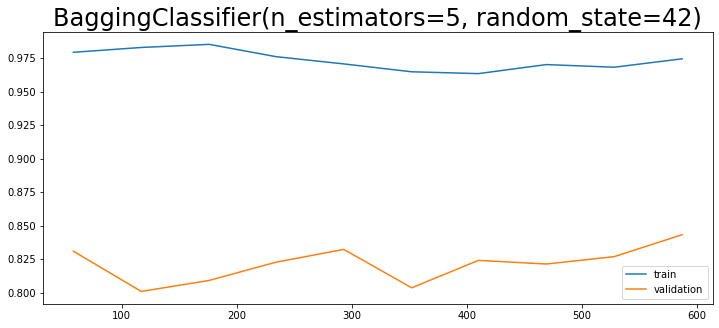

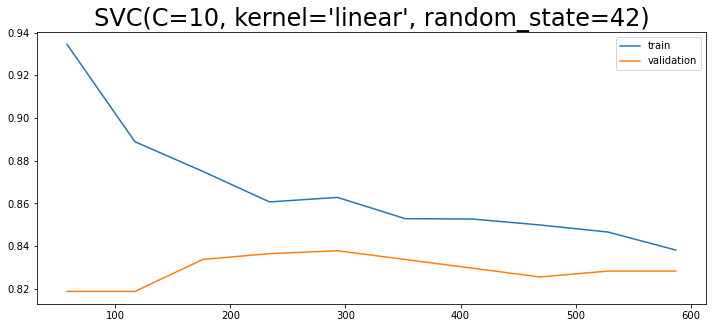

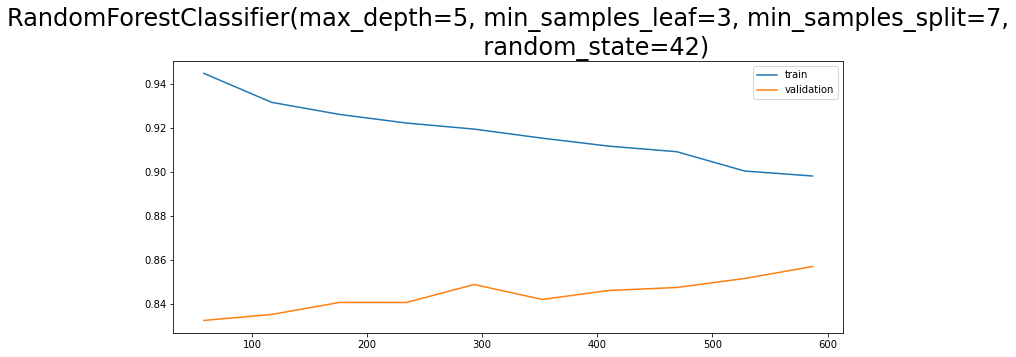

In [26]:
for model in models:
    courbe_appentissage(model)

- Modelisation 2

In [ ]:
# Normalisons les données quantitatives